In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import lognorm


In [ ]:
numbers_list = list(range(1,2026)) # my initial function which sims the game
diffs = []
def Hat_Numbers(numbers):
  numbers_copy = numbers[:]
  for i in range(2024):
    n1, n2 = np.random.choice(numbers_copy, 2, replace = False)

    numbers_copy.remove(n1)
    numbers_copy.remove(n2)
    diff = np.abs(n2-n1)
    numbers_copy.append(diff)
    diffs.append(diff)

  return numbers_copy



output =[]
for i in range(100):
  Hat_Numbers(numbers_list)
  output.append(Hat_Numbers(numbers_list)[0])

print("The mean result after playing 5000 games is", np.mean(Hat_Numbers(numbers_list)))
print("The mean difference between two numbers picked is", np.mean(diffs))







The mean result after playing 5000 games is 173.0
The mean difference between two numbers picked is 618.1661848858474


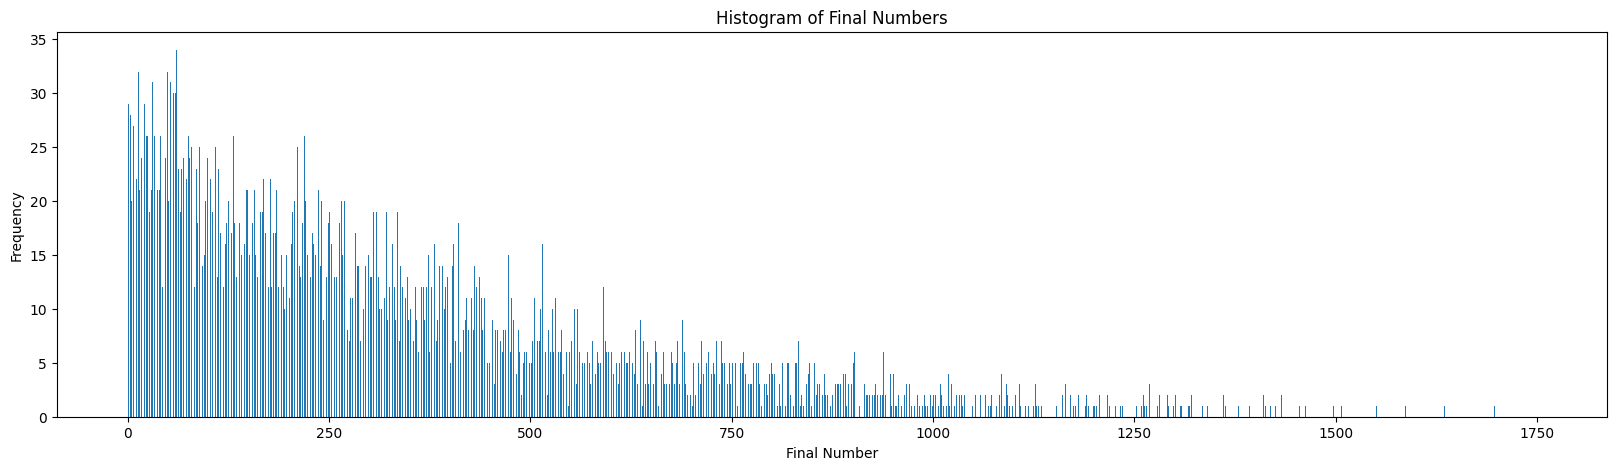

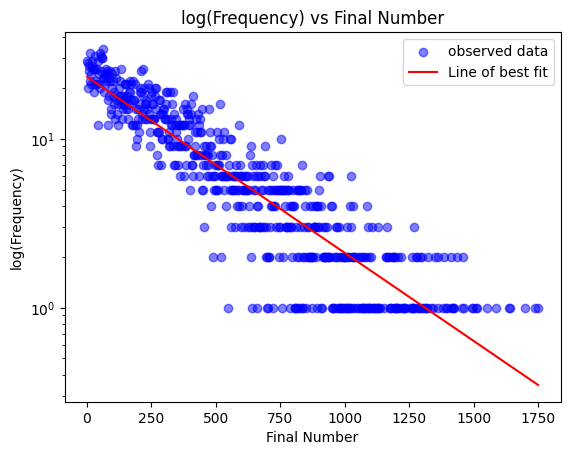

-0.002402231856455226
mean: 336.7904
standard deviation: 294.7565274389017
ModeResult(mode=61, count=34)
The largest final number was 1749
The smallest final number was 1


In [ ]:
# important piece of code shows 2 graphs, hist and exp relationship, prints slope of lobf which gives me alpha. I reran this a few times so pics may look diff
hist_nums = []

for i in range(5000):
  hist_nums.append(Hat_Numbers(numbers_list)[0])
  numbers_list = list(range(1,2026))

setnums = set(hist_nums)
intsetsums = []
freq = []
for x in setnums:
  intsetsums.append(x)
  freq.append(hist_nums.count(x))



mx = max(hist_nums)
bins = np.arange(0,mx+2)-0.5



mu = np.mean(hist_nums)
sigma = np.std(hist_nums)









fig = plt.figure(figsize = (20,5))
plt.hist(hist_nums, bins = bins)
#plt.plot(np.linspace(x.min(), x.max(), 100), lognorm.pdf(np.linspace(x.min(), x.max(), 100), s=mu, scale=np.exp(sigma)), label='Log-normal Distribution')


plt.xlabel("Final Number")
plt.ylabel("Frequency")
plt.title("Histogram of Final Numbers")
plt.show()


figure = plt.figure()
plt.xlabel("Final Number")
plt.ylabel("log(Frequency)")
plt.title("log(Frequency) vs Final Number")
axis = plt.gca()
axis.scatter(intsetsums, freq, c = 'blue', alpha = 0.5, label = "observed data")
axis.set_yscale('log')
axis.set_xscale('linear')
coefs = np.polyfit(intsetsums, np.log(freq), 1)
slope,_ = coefs
fit_coefs = np.poly1d(coefs)
y_fit = fit_coefs(intsetsums)
plt.plot(intsetsums, np.exp(y_fit), c = 'r', label = "Line of best fit")
plt.legend()

plt.show()

print(slope)
print("mean:",np.mean(hist_nums))
print("standard deviation:",np.std(hist_nums))
print(stats.mode(hist_nums))
print("The largest final number was",np.max(hist_nums))
print("The smallest final number was",np.min(hist_nums))


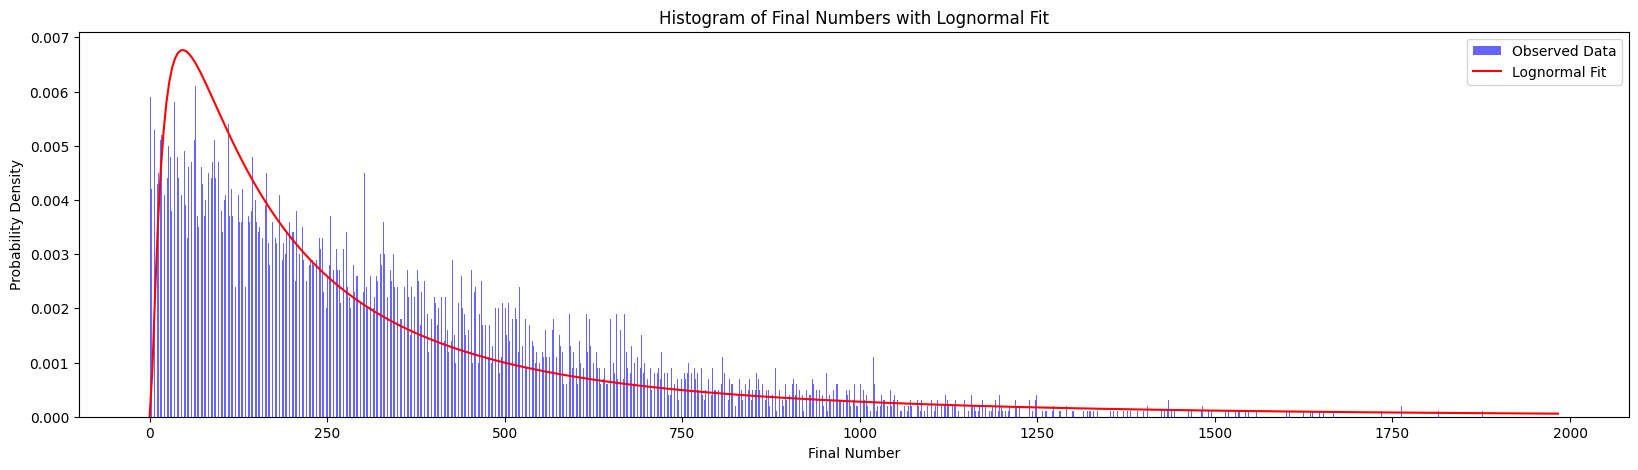

In [ ]:
hist_nums = []  # log normal fit investigation

for i in range(10000):
  hist_nums.append(Hat_Numbers(numbers_list)[0])
  numbers_list = list(range(1,2026))

shape, loc, scale = lognorm.fit(hist_nums, floc=0)
x = np.linspace(0, max(hist_nums), 500)
pdf = lognorm.pdf(x, shape, loc, scale)

mx = max(hist_nums)
bins = np.arange(0,mx+2)-0.5


# Plot histogram with lognormal fit
plt.figure(figsize=(20, 5))
plt.hist(hist_nums, bins=bins, density=True, alpha=0.6, color='blue', label="Observed Data")
plt.plot(x, 2*pdf, 'r-', label="Lognormal Fit")
plt.xlabel("Final Number")
plt.ylabel("Probability Density")
plt.title("Histogram of Final Numbers with Lognormal Fit")
plt.legend()
plt.show()



In [ ]:
numbers_list = list(range(1,2026))

odds = 0
for i in range(1000):
  Hat_Numbers(numbers_list)
  if Hat_Numbers(numbers_list)[0]%2 != 0:
    odds += 1
print("Over 1000 trials the number of odd final numbers is", odds)

Over 1000 trials the number of odd final numbers is 100


In [ ]:
for i in range(5000):
  Hat_Numbers(numbers_list)
  if Hat_Numbers(numbers_list)[0] == 1:
    print("it is possible to get 1")
    break





it is possible to get 1


In [ ]:
n = 5
numbers_list = list(range(1,n+1))

def Hat_Numbers_var(numbers):    # made this so I can look at other values of n
  numbers_copy = numbers[:]
  for i in range(n-1):
    n1, n2 = np.random.choice(numbers_copy, 2, replace = False)

    numbers_copy.remove(n1)
    numbers_copy.remove(n2)
    diff = np.abs(n2-n1)
    numbers_copy.append(diff)
    diffs.append(diff)

  return numbers_copy
k = 20
sum = 0
for i in range(k):
  store = Hat_Numbers_var(numbers_list)[0]
  if store == n:
    print(store)
    print("it is possible to get", n)
    break
  else:
    print(store)
    sum += 1
if sum == k:
    print("in these trials we didn't obtain", n)

3
1
3
1
1
1
1
1
3
3
5
it is possible to get 5


In [ ]:
# method to get max number every time, this could be adapted to get any odd number
n = 2025
numbers_list = list(range(1,n+1))

def Hat_Numbers_max(numbers):
  numbers_copy = numbers.copy()
  for i in range(int((n-1)/2)):
    n1 = numbers_copy[0]
    n2 = numbers_copy[1]

    numbers_copy.remove(n1)
    numbers_copy.remove(n2)

    diff = np.abs(n2-n1)
    numbers_copy.append(diff)



  copy_v2 = numbers_copy.copy()


  for i in range(int((n-1)/2)-1):
      n1 = copy_v2[1]
      n2 = copy_v2[2]

      copy_v2.remove(n1)
      copy_v2.remove(n2)
      diff = np.abs(n2-n1)
      copy_v2.append(diff)

  return copy_v2



print(Hat_Numbers_max(numbers_list))
#


[2025, 0]


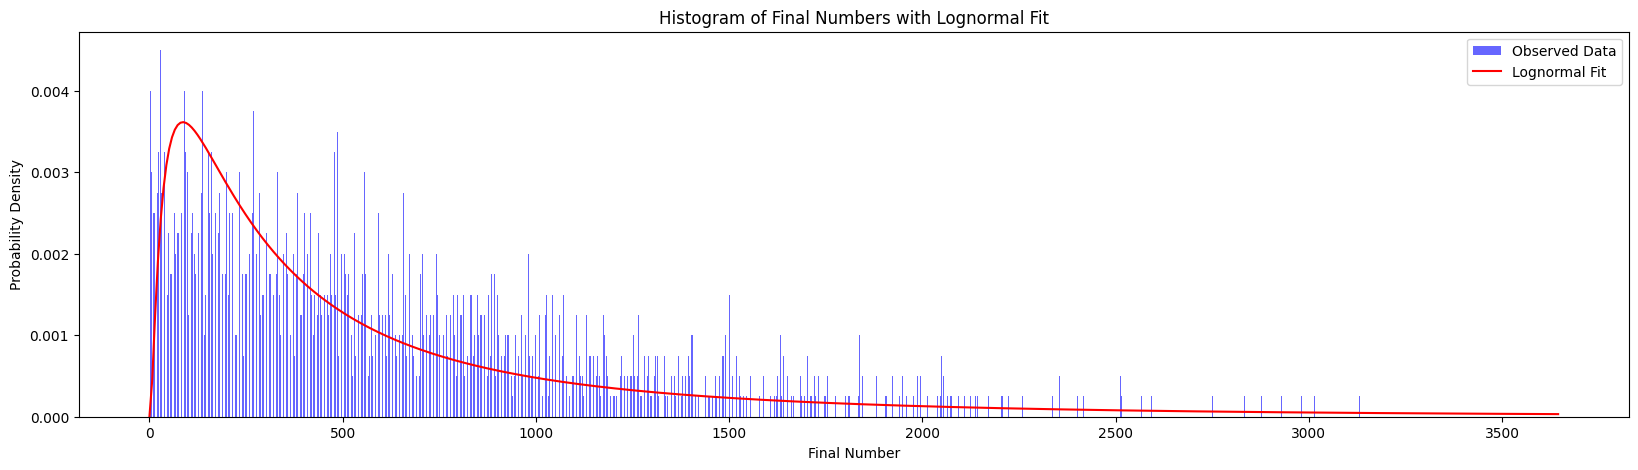

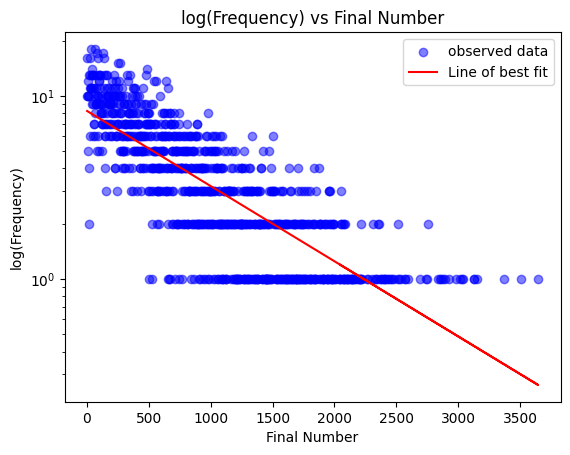

-0.0009456740293580512
630.7635
552.6206990945507
ModeResult(mode=29, count=18)


In [ ]:
n = 4001    # part of extension, looking at different n values, taking over 12 hours to run on large n though
numbers_list = list(range(1,n+1))
hist_nums = []
#number_odds = 0
for i in range(4000):
  hist_nums.append(Hat_Numbers_var(numbers_list)[0])

setnums = set(hist_nums)
intsetsums = []
freq = []
for x in setnums:
  intsetsums.append(x)
  freq.append(hist_nums.count(x))


mu = np.mean(hist_nums)
sigma = np.std(hist_nums)


mx = max(hist_nums)
bins = np.arange(0,mx+2)-0.5
"""
plt.hist(hist_nums, bins = bins)
plt.xlabel("Final Number")
plt.ylabel("Frequency")
plt.title("Histogram of Final Numbers")
plt.show()
"""

shape, loc, scale = lognorm.fit(hist_nums, floc=0)
x = np.linspace(0, max(hist_nums), 500)
pdf = lognorm.pdf(x, shape, loc, scale)

mx = max(hist_nums)
bins = np.arange(0,mx+2)-0.5


# Plot histogram with lognormal fit
plt.figure(figsize=(20, 5))
plt.hist(hist_nums, bins=bins, density=True, alpha=0.6, color='blue', label="Observed Data")
plt.plot(x, 2*pdf, 'r-', label="Lognormal Fit")
plt.xlabel("Final Number")
plt.ylabel("Probability Density")
plt.title("Histogram of Final Numbers with Lognormal Fit")
plt.legend()
plt.show()

figure = plt.figure()
plt.xlabel("Final Number")
plt.ylabel("log(Frequency)")
plt.title("log(Frequency) vs Final Number")
axis = plt.gca()
axis.scatter(intsetsums, freq, c = 'blue', alpha = 0.5, label = "observed data")
axis.set_yscale('log')
axis.set_xscale('linear')
coefs = np.polyfit(intsetsums, np.log(freq), 1)
slope,_ = coefs
fit_coefs = np.poly1d(coefs)
y_fit = fit_coefs(intsetsums)
plt.plot(intsetsums, np.exp(y_fit), c = 'r', label = "Line of best fit")
plt.legend()

plt.show()


print(slope)
print(mu)
print(sigma)
print(stats.mode(hist_nums))